# Project 4: Comcast Telecom Consumer Complaints

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Import data into Python environment

In [2]:
comcast_df = pd.read_csv("Comcast_telecom_complaints_data.csv")
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
# View Describtion
comcast_df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


## 2. Provide the trend chart for the number of complaints at monthly and daily granularity levels

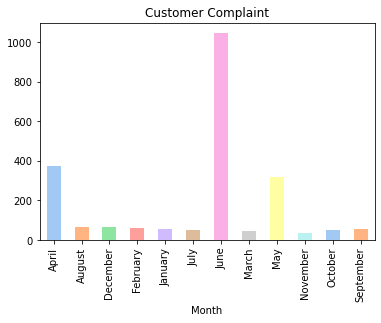

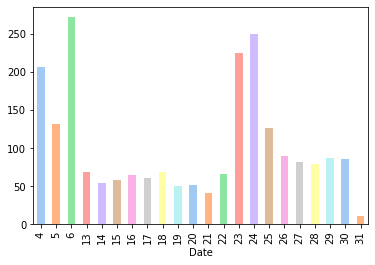

In [4]:
comcast_df['Month'] = pd.to_datetime(comcast_df['Date_month_year']).dt.month_name()
comcast_df['Date'] = pd.to_datetime(comcast_df['Date_month_year']).dt.day

comcast_df.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar',color =(sns.color_palette("pastel")),subplots=True)                                   
plt.show()

comcast_df.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar',color =(sns.color_palette("pastel")))
plt.show()

## 3. Provide a table with the frequency of complaint types

In [5]:
comcast_df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


## 4. Which complaint types are maximum i.e., around internet, network issues, or across any other domains

In [6]:
comcast_df['Customer Complaint'].value_counts().head()

Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Comcast Billing     11
Name: Customer Complaint, dtype: int64

## 5. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [12]:
comcast_df['Status']=comcast_df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')
comcast_df['Status'].value_counts().head()

Closed    1707
Open       517
Name: Status, dtype: int64

## 6. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

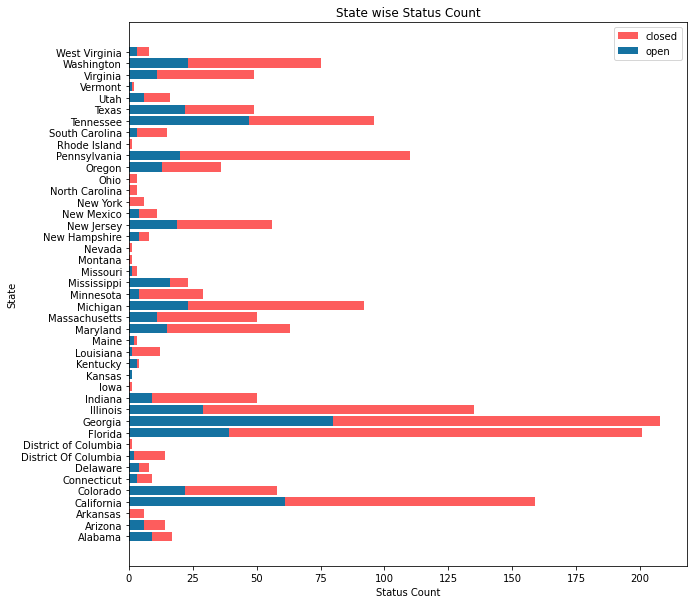

In [30]:
opn=comcast_df[comcast_df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
clos=comcast_df[comcast_df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(clos.State, clos.Status, color='#FD5D5D')
plt.barh(opn.State, opn.Status,color='#1572A1')
plt.ylabel("State")
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("State wise Status Count")

plt.show()

## 7. Which state has the maximum complaints

In [34]:
comcast_df.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: Customer Complaint, dtype: int64

## 8. Which state has the highest percentage of unresolved complaints

In [32]:
uc_df=comcast_df.loc[comcast_df['Status']=='Open',['State']].value_counts()
uc_df.head(1)/uc_df.sum()*100

State  
Georgia    15.473888
dtype: float64

## 9. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [33]:
comcast_df[comcast_df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64